## **Natural Language  Processing Project**

## **Group 1 Members**
#### Peter Mbuthia
#### Marion Macharia
#### Mitch Mathiu
#### Mercy Jepkogei


In [104]:
from IPython.display import Image

Image(url='https://miro.medium.com/v2/resize:fit:1358/0*eF-zGimEKElO9HYF', width=1000)

# **Objectives**

#### 1) Compare binary model performance to multiclass model.

#### 2) Determine the product that has the most positive & negative sentiments.



# **Business Understanding**
#### This project seeks to accurately gauge customer sentiment towards our brand based on their Twitter interactions. Additionally, stakeholders may use this to inform customer engagement strategies and improve product or service offerings.

## **Summary of the Project**

#### The project begins by exploring the sentiment dataset sourced from CrowdFlower via data.world (https://data.world/crowdflower/brands-and-product-emotions). The dataset undergoes an EDA process that involves handling null values through a for loop that is able to extract items to replace the null values in it. With a clean dataset, it is easier to determine that Ipad is the most mentioned product, neutral sentiments are more than both positve and negative ones and that the ipad device is rated highest in the sentiment distribution among products.

#### In order to undertake the modeling process, the tweet_text column referenced as tweets, undergoes a preprocessing phase (tokenization, vectorization & lemmantization) that distills the irrelevant articles that wouldn't be easily translated by the machine learning model. This also helps in identifying the most frequent phrases & words observed among the tweets. In this case, Apple Store is the most mentioned text across the texts with a frequency of 520.

#### The Modelling Phase consists of a binary & multiclassifier comparison across diverse models. They include; Logistic Regression, XGBOOST, Support Vector and Random Forest Classifier. The results of the model perfomances demonstrate that these models perform best under binary (Accuracy Score ranging from 84-89%) than in multiclass classifier 67, even with best parameters applied.

#### The recommendation for enhanced classification comprises of;
#### 1) using aspect-based sentiment analysis to provide context.
#### 2) sample data from high impact users including relevant   influencers & tech communities
#### 3) Enhance sentiment models to interpret more nuanced emotions beyond the regular (positive, negative & neutral)

### **Data Understanding**

#### This dataset is a list of sampled tweets about Apple and Google products with 9093 entries, within it there are three columns;

   #### 1) tweet_text - contains sampled tweets about the products.

   #### 2) emotion_in_tweet_is_directed_at - which product the tweet is about.
   
   #### 3) is_there_an_emotion_directed_at_a_brand_or_product - which sentiment the tweet is about.

# **Import the necessary libraries**

#### These may be needed including Pandas, numpy, matplotlib and nltk.

In [54]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# load the dataset
sentiment_tweet = pd.read_csv("/content/judge-1377884607_tweet_product_company.csv", encoding= "latin-1")
sentiment_tweet.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [56]:
# Make a copy for manipulation

df = sentiment_tweet.copy()

# **Exploratory Data Analysis**

#### Explore the contents of the dataset to better understand it. Determining missing values, renaming columns, handling duplicate columns,and evaluate the disribution of products.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [58]:
# Rename the columns for easier reference

df.rename(columns= {
          "tweet_text" : "tweets",
          "emotion_in_tweet_is_directed_at": "product_type",
          "is_there_an_emotion_directed_at_a_brand_or_product" : "emotion_type"
          }, inplace=True)



In [59]:
df.head()

,tweets,product_type,emotion_type
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [60]:
# Find the missing values
df.isnull().sum()

,0
tweets,1
product_type,5802
emotion_type,0


## Handling Duplicates

In [61]:
df.duplicated().sum()



22

In [62]:
df.drop_duplicates(subset= "tweets" , inplace=True)

In [63]:
df.duplicated().sum()

0

## Handling Missing Values

In [64]:
df.isnull().sum()

,0
tweets,1
product_type,5786
emotion_type,0


In [65]:
df.dropna(subset=['tweets'], inplace=True)


In [66]:
# create a products variable to establish unique values in the emotion_in_tweet_is_directed_at column

# Check the unique values in the product_type column
products_list = df["product_type"].unique()
products_list

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [67]:
# Remove the Nan values
products_list = [product_type for product_type in products_list if str(product_type) != "nan"]
products_list

['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

In [68]:
# Check the distribution count after removing the nan
df["product_type"].value_counts()

,count
product_type,
iPad,943
Apple,659
iPad or iPhone App,469
Google,428
iPhone,296
Other Google product or service,293
Android App,80
Android,77
Other Apple product or service,35


In [69]:
# Using a for loop extract the product contained in the tweets, filling in the missing values in the product_type column
def extract_product(tweet):
    for product in products_list:
        if product.lower() in tweet.lower():
            return product
    return None

df["product_type"] = df.apply(lambda x: extract_product(x["tweets"]) if pd.isna(x["product_type"]) else x["product_type"], axis=1)

df.head(10)

,tweets,product_type,emotion_type
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,iPad,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [70]:
# Check the percentage of missing values

missing_values_percentage = (df["product_type"].isnull().sum() / len(df)) * 100
print(missing_values_percentage)

8.372862658576945


In [71]:
 # Given the small percentage of missing values,fill in the missing product_type column values with None

df["product_type"].fillna("None", inplace=True)

In [72]:
# Determine the number of times each product type is mentioned
df["product_type"].value_counts()

,count
product_type,
iPad,2435
Google,2143
Apple,1347
iPhone,1211
None,759
iPad or iPhone App,469
Android,293
Other Google product or service,293
Android App,80


In [73]:
# Establish the different unique emotions exhibited in the dataset
df["emotion_type"].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [74]:
# Drop 'I can't tell' from emotion_type
df = df[df["emotion_type"] != "I can't tell"]

In [75]:
# check if the 759 missing values are among the dropped emotion_type

df[df["product_type"]== "None"]["emotion_type"].value_counts()


,count
emotion_type,
No emotion toward brand or product,739
Positive emotion,13
Negative emotion,1


In [76]:
# Create a new column with Sentiment column with (positve, negative and neutral)
df.loc[:, "sentiment"] = df["emotion_type"].apply(lambda x: "positive" if x == "Positive emotion" else ("negative" if x == "Negative emotion" else "neutral"))

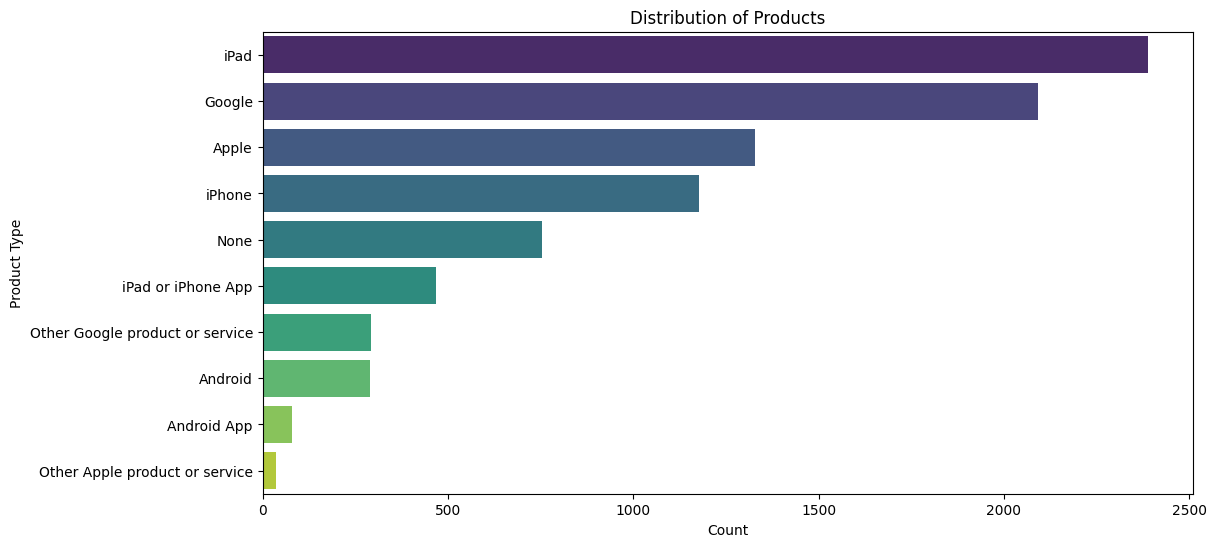

In [77]:
# Plot the distribution of products without hue
plt.figure(figsize=(12, 6))
sns.countplot(y='product_type', data=df, order=df['product_type'].value_counts().index, palette="viridis")
plt.title('Distribution of Products')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

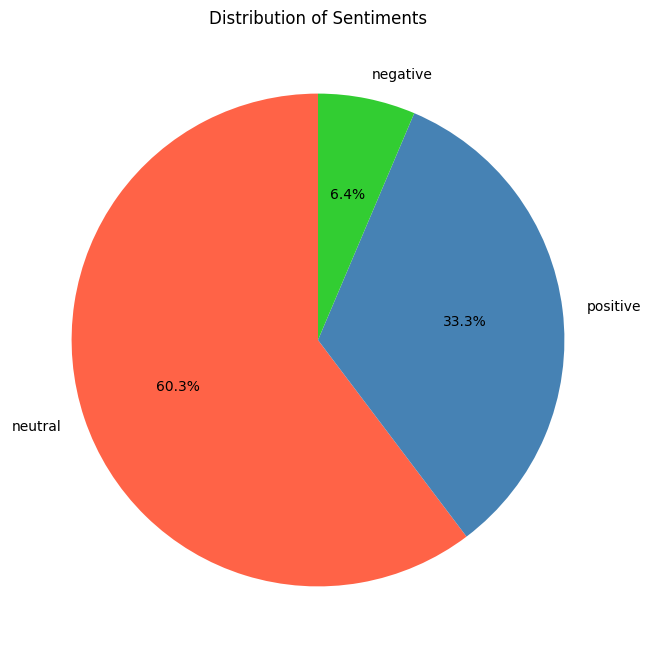

In [78]:
#Distribution of sentiments
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Define a diverse color palette for the pie chart
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#800080']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Sentiments')
plt.show()


#### The Pie Chart above displays that the percentage of neural sentiments is higher (60.3%), followed by positive (33.3%) then negative at (6.4%). With such a collection, there is likelihood of a class imbalance challenge when analyzing the sentiments. With the bar chart showcasing the top ten products with ipad getting the most mentions of about 2300.

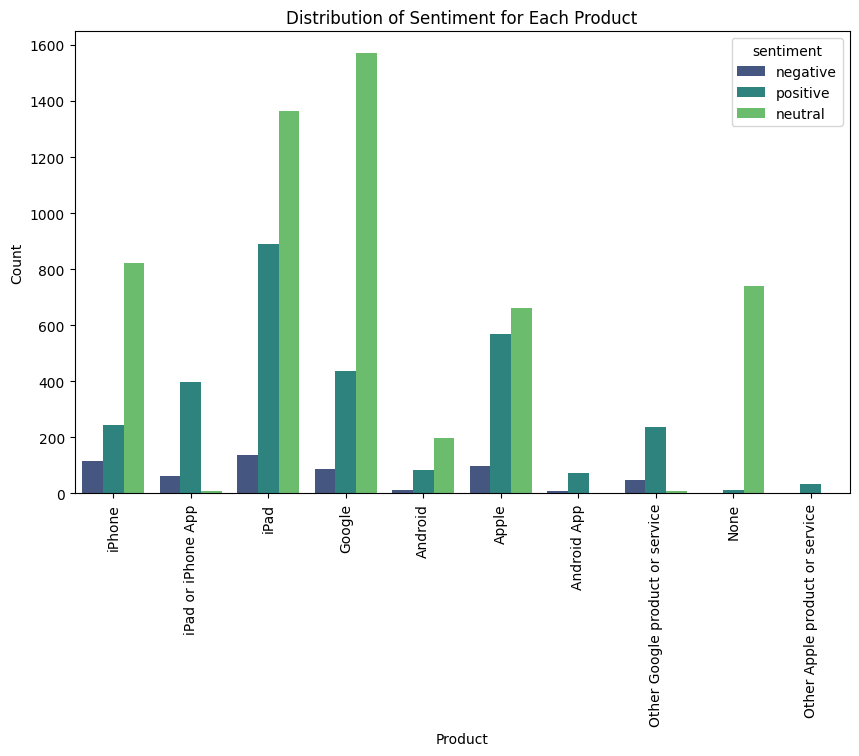

In [79]:
#Distribution of sentiment for each product using a stacked barplot

plt.figure(figsize=(10, 6))
sns.countplot(x='product_type', hue='sentiment', data=df, palette="viridis")
plt.title('Distribution of Sentiment for Each Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 ### The plot above demonstrates that the distribution of neutral sentiments across the product is high. This may be as a result of a class imbalance, whereby the number of neutral sentiments are more than those of either positive or negative. According to the plot, the ipad product has the highest positive sentiment of 900 whilst the highest negative sentiments are observed to affect the iphone product.  

# **Preprocessing**

#### In this section, preparation of the dataset for modelling takes place. This process includes removing of irrelevant parts of text to make it easy for the model to read through the text. Additionally, the text is taken through tokenization, vectorization and lemmentization to make the detection of key words that influence and inform the sentiment analysis process.

In [80]:
# Clean the tweets column by removing irrelevant articles

import re
# Function to clean tweet text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the tweets
df['cleaned_tweets'] = df['tweets'].apply(clean_text)

# Display the first 10 cleaned tweets
df[['tweets', 'cleaned_tweets']].head(5)

,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,I have a G iPhone After hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about Awesome iPadiPhone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for also They should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,I hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri Marissa Mayer Google Tim OR...


In [81]:
# Convert cleaned tweets to lowercase
df['cleaned_tweets'] = df['cleaned_tweets'].str.lower()

# Display the first 10 lowercased tweets
df[['tweets', 'cleaned_tweets']].head(5)

,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri marissa mayer google tim or...


In [82]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply stopwords removal
df['cleaned_tweets'] = df['cleaned_tweets'].apply(remove_stopwords)

df[['tweets', 'cleaned_tweets']].head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting dead need upgrade plugin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


In [83]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize # Import the word_tokenize function
# Tokenize the cleaned tweets
df['tokens'] = df['cleaned_tweets'].apply(word_tokenize)

df[['tweets', 'cleaned_tweets', 'tokens']].head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweets,cleaned_tweets,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting dead need upgrade plugin...,"[g, iphone, hrs, tweeting, dead, need, upgrade..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app,"[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, fri, marissa, mayer, google, ti..."


In [84]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


df[['tokens', 'lemmatized_tokens']].head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,lemmatized_tokens
0,"[g, iphone, hrs, tweeting, dead, need, upgrade...","[g, iphone, hr, tweeting, dead, need, upgrade,..."
1,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,"[wait, also, sale]","[wait, also, sale]"
3,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


# **Vectorization**

In [85]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                   max_features=5000,
                                   stop_words='english',
                                   min_df=5,
                                   max_df=0.8)

# Fit and transform the tweets into a vectorized format
X = tfidf_vectorizer.fit_transform(df['cleaned_tweets'])

# Check the shape of the resulting vectorized data
print("Shape of the TF-IDF matrix:", X.shape)

Shape of the TF-IDF matrix: (8909, 3634)


In [86]:
# Reduce the sparsity by using biggram coupling the words in twos
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_tweets'])

bigram_counts = X_bigrams.sum(axis=0)
bigram_freq = pd.DataFrame(bigram_counts.T, index=bigram_vectorizer.get_feature_names_out(), columns=['count'])

bigram_freq = bigram_freq.sort_values(by='count', ascending=False)

# Select the top 10 bigrams
top_bigrams = bigram_freq.head(10)
top_bigrams

,count
apple store,520
social network,436
new social,404
popup store,317
network called,313
google launch,301
today link,293
rt google,287
major new,284
called circles,283


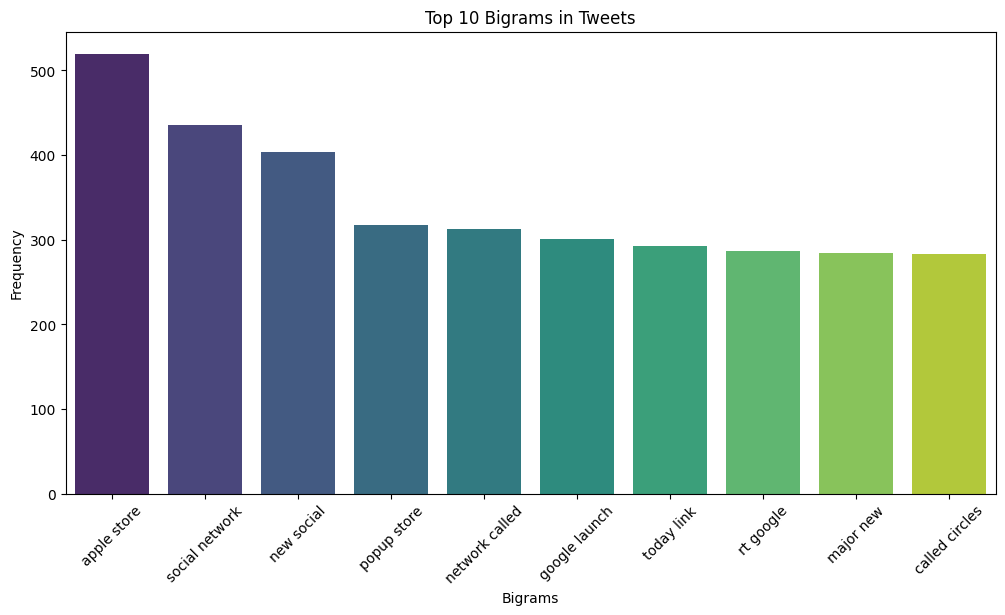

In [87]:
# Plotting the top 10 bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bigrams.index, y=top_bigrams['count'], hue= top_bigrams.index, palette='viridis')
plt.title('Top 10 Bigrams in Tweets')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### The plot above demonstrates the most used phrase among the tweets showcasing apple store with the highest frequency/appearance of (520), followed by social network (436), and the tenth phrase as called circles(283). This affirms that majority of the tweets references mostly 'apple store'.

In [88]:
df.head()

,tweets,product_type,emotion_type,sentiment,cleaned_tweets,tokens,lemmatized_tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,g iphone hrs tweeting dead need upgrade plugin...,"[g, iphone, hrs, tweeting, dead, need, upgrade...","[g, iphone, hr, tweeting, dead, need, upgrade,..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,wait also sale,"[wait, also, sale]","[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,hope years festival isnt crashy years iphone app,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,great stuff fri marissa mayer google tim oreil...,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


# **Modeling**

#### In this section, expose the cleaned and preprocessed dataset to diverse models for sentiment analysis. Evaluate how accurate the models perform in binary and multiclass. For a baseline model, use logistic regression

### 1) Logistic Regression

#### Binary Classification

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Filter the dataset to include only 'positive' and 'negative' sentiments
df_filtered = df[df['sentiment'].isin(['positive', 'negative'])]

# Split the filtered data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered['tweets'],
                                                    df_filtered['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42)

# Create a TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.8601694915254238
              precision    recall  f1-score   support

    negative       0.94      0.13      0.23       113
    positive       0.86      1.00      0.92       595

    accuracy                           0.86       708
   macro avg       0.90      0.57      0.58       708
weighted avg       0.87      0.86      0.81       708



#### The binary model achieves a high overall accuracy (86%), but the performance is skewed heavily towards predicting positive sentiment. While precision for negative sentiment is high (0.94), the recall is very low (0.13), indicating that the model rarely identifies negative samples correctly.

## Hyper Parameter Tuning

#### Aiming to imporve the performance of the model, use:
####1) C which Controls regularization strength (smaller values imply stronger regularization).
#### 2: Penalty: Regularization type (l1 for Lasso, l2 for Ridge).
#### 3) Solver: liblinear is good for small datasets, while saga can handle large datasets.
#### 4) Class Weight: Helps address class imbalance by weighting classes more equally.

In [90]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=500)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(report)


Best Hyperparameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8898305084745762
              precision    recall  f1-score   support

    negative       0.70      0.55      0.61       113
    positive       0.92      0.95      0.94       595

    accuracy                           0.89       708
   macro avg       0.81      0.75      0.77       708
weighted avg       0.88      0.89      0.88       708



#### After tuning the score accuracy score improves to 89 % , provided the best parameters determined as: 'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear' as highlighted in the results above.

####  Evaluate the logistic regression model multiclass performance.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

In [92]:
# Build and train a Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.6694725028058361
              precision    recall  f1-score   support

    negative       0.37      0.60      0.46       123
     neutral       0.79      0.71      0.75      1069
    positive       0.58      0.62      0.60       590

    accuracy                           0.67      1782
   macro avg       0.58      0.64      0.60      1782
weighted avg       0.69      0.67      0.68      1782



### The multiclass logistic regression model has an accuracy performance of 67 with precision scores of positive and negative at 58 and 37 respectively. The neutral score is higher with a score of 79, despite the application of the class weight balance strategy to counter the potential class imbalance.

In [93]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Train the model on the resampled data
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.6666666666666666
              precision    recall  f1-score   support

    negative       0.38      0.50      0.43       123
     neutral       0.76      0.73      0.75      1069
    positive       0.58      0.58      0.58       590

    accuracy                           0.67      1782
   macro avg       0.57      0.61      0.59      1782
weighted avg       0.68      0.67      0.67      1782



### The use of Synthetic Minority Over-sampling Technique(SMOTE) / Undersampling only improves the negative precision score by one from 37 to 38. The accuracy score remains at 67.  

### Hyperparameter tuning

In [94]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1_macro',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Cross-validation Score: 0.5735161216037361
Test Accuracy: 0.6947250280583613
Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.37      0.42       123
     neutral       0.75      0.79      0.77      1069
    positive       0.62      0.58      0.60       590

    accuracy                           0.69      1782
   macro avg       0.62      0.58      0.60      1782
weighted avg       0.69      0.69      0.69      1782



The results show that the logistic regression model, optimized with hyperparameter tuning (C=10, class_weight='balanced', solver='liblinear'), achieved a cross-validation F1-macro score of 0.5735 and test accuracy of 69.47%. However, the model performs well for the neutral class (F1-score = 0.77) but struggles with the minority negative and positive classes, particularly negative (F1-score = 0.42). This imbalance skews overall performance, as seen in the macro average F1-score of 0.60. To improve, consider exploring alternative models like SVM or ensemble methods. Feature engineering with n-grams or word embeddings may also enhance performance.

### **Use of Advanced Machine Learning Models**

#### Utilize XGBOOST, SVM & Random Classifier to try and see if the predictive performance improves in terms of accuracy and precision for all classes.

 ### 2) XGBOOST Model Alternative

#### XGBOOST is an advanced model that outperfroms logistic regression, therefore, a logical trial to determine whether there will be any improvements in performance.

In [95]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Filter the dataset to only include 'positive' and 'negative' sentiments

mask_train = np.isin(y_train, ['positive', 'negative'])
mask_test = np.isin(y_test, ['positive', 'negative'])

X_train_binary = X_train_tfidf[mask_train]
y_train_binary = y_train[mask_train]

X_test_binary = X_test_tfidf[mask_test]
y_test_binary = y_test[mask_test]

# Encode the binary labels (positive and negative)
label_encoder = LabelEncoder()

# Fit the encoder on the binary training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train_binary)

# Initialize the XGBoost model for binary classification
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the binary sentiment data
xgb_model.fit(X_train_binary, y_train_encoded)

# Transform the binary test labels and make predictions
y_test_encoded = label_encoder.transform(y_test_binary)
y_pred_xgb = xgb_model.predict(X_test_binary)

# Evaluate XGBoost on the test set
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

# Step 7: Print the performance metrics
print(f"XGBoost Test Accuracy: {accuracy_xgb}")
print(f"XGBoost Classification Report:\n{report_xgb}")


XGBoost Test Accuracy: 0.8583450210378681
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.31      0.43       123
           1       0.87      0.97      0.92       590

    accuracy                           0.86       713
   macro avg       0.79      0.64      0.67       713
weighted avg       0.84      0.86      0.83       713



#### Multiclass Trial

In [96]:

# Fit the encoder on the training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Now use the encoded labels to train the XGBoost model
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Remember to transform the test labels as well before making predictions
y_test_encoded = label_encoder.transform(y_test)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Evaluate XGBoost on the test set
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print(f"XGBoost Test Accuracy: {accuracy_xgb}")
print(f"XGBoost Classification Report:\n{report_xgb}")




XGBoost Test Accuracy: 0.6823793490460157
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.16      0.26       123
           1       0.70      0.88      0.78      1069
           2       0.63      0.44      0.52       590

    accuracy                           0.68      1782
   macro avg       0.67      0.49      0.52      1782
weighted avg       0.67      0.68      0.66      1782



#### Accuracy comparison shows that XGBoost: 68.2% & Logistic Regression: 66.9%. The difference in accuracy is minimal, with XGBoost slightly outperforming Logistic Regression by about 1.3%.

#### 3) Support Vector Machine Model (SVM)

#### SVM is a potentially good model for sentiment analysis as it handles text classification effectively. Focusing first on the binary classification then see how it performs with a multiclass set.



#### Binary Classifier Trial

In [97]:
from sklearn.svm import SVC

# Filter out neutral or other classes, leaving only 'positive' and 'negative'
mask_train = np.isin(y_train, ['positive', 'negative'])
mask_test = np.isin(y_test, ['positive', 'negative'])

X_train_binary = X_train_tfidf[mask_train]
y_train_binary = y_train[mask_train]

X_test_binary = X_test_tfidf[mask_test]
y_test_binary = y_test[mask_test]

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                               scoring='f1_macro',
                               cv=5,
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train_binary, y_train_binary)

# Print best parameters and performance
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Cross-validation Score (SVM):", grid_search_svm.best_score_)

# Evaluate SVM on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_binary)

# Performance metrics
accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
report_svm = classification_report(y_test_binary, y_pred_svm)

print(f"SVM Test Accuracy: {accuracy_svm}")
print(f"SVM Classification Report:\n{report_svm}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (SVM): {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
Best Cross-validation Score (SVM): 0.7360761242234052
SVM Test Accuracy: 0.8653576437587658
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.60      0.61       123
    positive       0.92      0.92      0.92       590

    accuracy                           0.87       713
   macro avg       0.76      0.76      0.76       713
weighted avg       0.86      0.87      0.86       713



#### Multiclass Classfier Trial

In [98]:

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced']
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                               scoring='f1_macro',  # F1-macro to balance class performance
                               cv=5,  # 5-fold cross-validation
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train_tfidf, y_train)

# Print best parameters and performance
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Cross-validation Score (SVM):", grid_search_svm.best_score_)

# Evaluate SVM on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_tfidf)

# Performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Test Accuracy: {accuracy_svm}")
print(f"SVM Classification Report:\n{report_svm}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (SVM): {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
Best Cross-validation Score (SVM): 0.5628604213459656
SVM Test Accuracy: 0.67003367003367
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.38      0.49      0.42       123
     neutral       0.78      0.72      0.75      1069
    positive       0.58      0.62      0.60       590

    accuracy                           0.67      1782
   macro avg       0.58      0.61      0.59      1782
weighted avg       0.68      0.67      0.68      1782



### 4) Random Forest Model

>



#### Binary Model Trial

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Filter the dataset to only include 'positive' and 'negative' sentiments

mask_train = np.isin(y_train, ['positive', 'negative'])
mask_test = np.isin(y_test, ['positive', 'negative'])

X_train_binary = X_train_tfidf[mask_train]
y_train_binary = y_train[mask_train]

X_test_binary = X_test_tfidf[mask_test]
y_test_binary = y_test[mask_test]

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring='f1_macro',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_train_binary, y_train_binary)

# Print best parameters and performance
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Cross-validation Score (Random Forest):", grid_search_rf.best_score_)

# Evaluate Random Forest on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_binary)

# Performance metrics
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
report_rf = classification_report(y_test_binary, y_pred_rf)

# Print performance metrics
print(f"Random Forest Test Accuracy: {accuracy_rf}")
print(f"Random Forest Classification Report:\n{report_rf}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters (Random Forest): {'class_weight': 'balanced', 'max_depth': 30, 'n_estimators': 300}
Best Cross-validation Score (Random Forest): 0.674953742715868
Random Forest Test Accuracy: 0.8387096774193549
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.56      0.33      0.41       123
    positive       0.87      0.95      0.91       590

    accuracy                           0.84       713
   macro avg       0.71      0.64      0.66       713
weighted avg       0.82      0.84      0.82       713



#### Multiclass trial

In [100]:
from sklearn.ensemble import RandomForestClassifier


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_train_tfidf, y_train)

# Print best parameters and performance
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Cross-validation Score (Random Forest):", grid_search_rf.best_score_)

# Evaluate Random Forest on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_tfidf)

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf}")
print(f"Random Forest Classification Report:\n{report_rf}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters (Random Forest): {'class_weight': 'balanced_subsample', 'max_depth': 30, 'n_estimators': 300}
Best Cross-validation Score (Random Forest): 0.5380663389542575
Random Forest Test Accuracy: 0.6677890011223344
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.24      0.32       123
     neutral       0.72      0.80      0.76      1069
    positive       0.58      0.52      0.55       590

    accuracy                           0.67      1782
   macro avg       0.58      0.52      0.54      1782
weighted avg       0.65      0.67      0.66      1782



#### Even with the best parameters, a Random Forest multiclassifier model still generates an accuracy score of 67% just like the other advanced models tested above.  

# **Conclusion**

#### Based on the EDA above, it is evident that the product with a high frequency of sentiments are from the Apple industry, with the Ipad product demonstrating a more positive reception among customers from the tweets sampled.

#### After testing diverse models for best possible sentiment analysis, it is evident that in both simple(logistic regression) and Advanced models(XGBOOST, SVM & Random Forest Classifier), binary classification performs best with high accuracy prediction scores of between (84% - 89%) after tuning the models to their best parameters. The multiclass trials exhibit a stagnation of prediction accuracy score of 67%. The *challenge* faced across the models is the class imbalance where neutral sentiments are more than those of positive and negative.


# **Recommendation**

#### 1) To get better insights, companies like Google and Apple may decide to focus on high impact users such as relevant product influencers and tech communities whom can provide more valuable insights about their products. This is usually informed by the high product engagement these target segmentation has.

#### 2) Seek to interrogate the neutral comments further using aspect-based sentiment analysis with the aim of contextualizing the comment. This may help identify valuable information/feedback about a product's performance or design.

#### 3) For the sentiment analysis model to perform better, introducing sentiment weighting might aid in distinguishing feedback from high-engagement users to reduce the influence of low-impact neutral responses influencing the overall insights.

#### 4) Lastly, Enhancing the sentiment classification models from the conventional(positive, negative and neutral) responses, where it can be able to interpret more nuanced emotions within text.  